# Auswertung

# Latex Rendering + library import + file reading + primitive plot

In [4]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()


In [16]:
# load file

fname = "data_to_start/srtio3_bulk_STO_633nm_300cm-1_2p5mW_5x50s_100xlong.txt"
fname = "data_aswathi/data/Data_Horiba/20250304/Ne_lamp_300_633.txt"
STO_2p5 = pd.read_csv(fname, sep="\t")

# STO_2p5.wavenumber
# STO_2p5.counts

STO_2p5

,wavenumber,counts
0,103.582,6.84211
1,103.582,-33.05260
2,103.978,2.10526
3,104.372,4.10526
4,104.767,4.84211
...,...,...
1019,487.574,9.47368
1020,487.935,8.73684
1021,488.294,10.42110
1022,488.654,8.52631


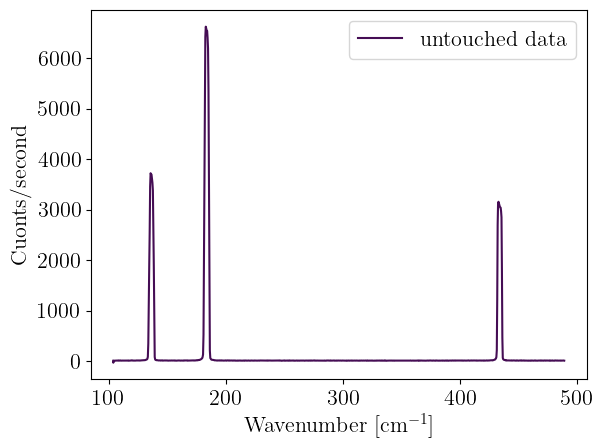

In [18]:
default_data = [
    [STO_2p5.wavenumber, STO_2p5.counts, "untouched data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]


### 1st peak

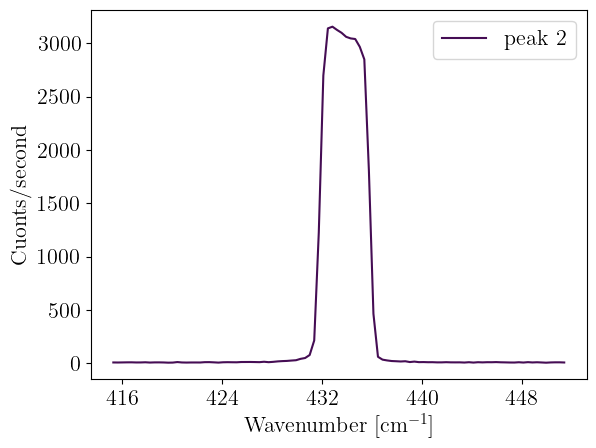

In [73]:
von1 = 40
zu1 = 130

von2 = 170
zu2 = 240

von3 = 820
zu3 = 920

first_p = [
    # [STO_2p5.wavenumber[von1:zu1], STO_2p5.counts[von1:zu1], "peak 1", c_scheme[0], "-", ""],
    # [STO_2p5.wavenumber[von2:zu2], STO_2p5.counts[von2:zu2], "peak 2", c_scheme[0], "-", ""],
    [STO_2p5.wavenumber[von3:zu3], STO_2p5.counts[von3:zu3], "peak 2", c_scheme[0], "-", ""],
]

p_func.plot_with_one_axis(first_p, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]


# fit gaussians to get the peak middle

In [61]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Fit the Gaussian
initial_guess = [3500, 136, 4]
params, covariance = curve_fit(gaussian, STO_2p5.wavenumber[von1:zu1], STO_2p5.counts[von1:zu1], p0=initial_guess)

# Unpack fitted parameters
amp_fit, x0_fit, sigma_fit = params

x_fit1 = np.linspace(STO_2p5.wavenumber[von1], STO_2p5.wavenumber[zu1], 200)
y_fit1 = gaussian(x_fit1, amp_fit, x0_fit, sigma_fit)

# Example usage
print("Fitted parameters:")
print(f"Amplitude: {amp_fit}")
print(f"Mean (x0): {x0_fit}")
print(f"Sigma: {sigma_fit}")

Fitted parameters:
Amplitude: 4112.036156414679
Mean (x0): 136.19575194626356
Sigma: 1.4557448042522352


In [62]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Fit the Gaussian
initial_guess = [6000, 184, 2]
params, covariance = curve_fit(gaussian, STO_2p5.wavenumber[von2:zu2], STO_2p5.counts[von2:zu2], p0=initial_guess)

# Unpack fitted parameters
amp_fit, x0_fit, sigma_fit = params

x_fit2 = np.linspace(STO_2p5.wavenumber[von2], STO_2p5.wavenumber[zu2], 200)
y_fit2 = gaussian(x_fit2, amp_fit, x0_fit, sigma_fit)

# Example usage
print("Fitted parameters:")
print(f"Amplitude: {amp_fit}")
print(f"Mean (x0): {x0_fit}")
print(f"Sigma: {sigma_fit}")

Fitted parameters:
Amplitude: 7425.121301467449
Mean (x0): 183.37360199381362
Sigma: 1.469552029654493


In [86]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Fit the Gaussian
initial_guess = [3000, 434, 2]
params, covariance = curve_fit(gaussian, STO_2p5.wavenumber[von3:zu3], STO_2p5.counts[von3:zu3], p0=initial_guess)

# Unpack fitted parameters
amp_fit, x0_fit, sigma_fit = params

x_fit3 = np.linspace(STO_2p5.wavenumber[von3], STO_2p5.wavenumber[zu3], 200)
y_fit3 = gaussian(x_fit3, amp_fit, x0_fit, sigma_fit)

# Example usage
print("Fitted parameters:")
print(f"Amplitude: {amp_fit}")
print(f"Mean (x0): {x0_fit}")
print(f"Sigma: {sigma_fit}")

Fitted parameters:
Amplitude: 3595.838537598953
Mean (x0): 433.7874874492065
Sigma: 1.456683851895056


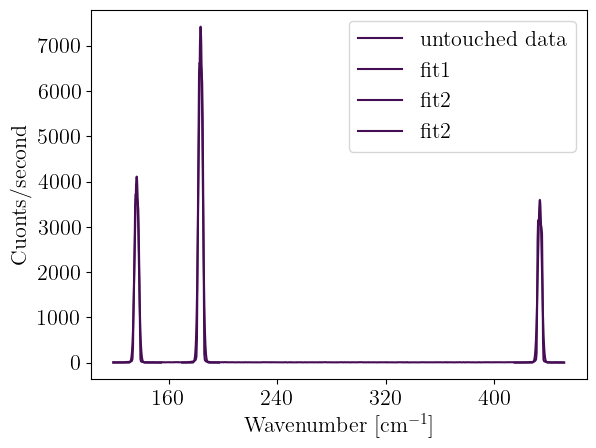

In [88]:
first_p = [
    [STO_2p5.wavenumber[von1:zu3], STO_2p5.counts[von1:zu3], "untouched data", c_scheme[0], "-", ""],
    [x_fit1, y_fit1, "fit1", c_scheme[0], "-", ""],
    [x_fit2, y_fit2, "fit2", c_scheme[0], "-", ""],
    [x_fit3, y_fit3, "fit2", c_scheme[0], "-", ""]

]

p_func.plot_with_one_axis(first_p, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]


# linear fit

Fitted parameters:
Slope (m): 0.0004294289382302961
Intercept (b): 0.004442720032935832


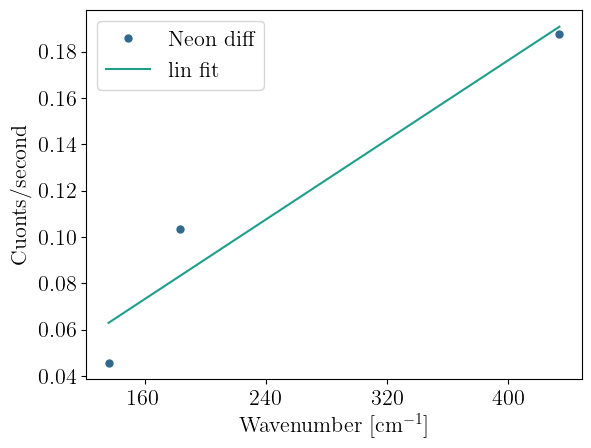

In [99]:
# have a look ad neon excel file

import numpy as np
from scipy.optimize import curve_fit

x_experimental = [136.195751946264, 183.373601993814, 433.787487449207]
y_diff = [0.0457519462635503, 0.103601993813612, 0.187487449206458]



# Define a linear function: y = m*x + b
def linear(x, m, b):
    return m * x + b

# Fit the linear function to your data
initial_guess = [1, 0]  # m=1, b=0
params, covariance = curve_fit(linear, x_experimental, y_diff, p0=initial_guess)

# Unpack fitted parameters
m_fit, b_fit = params

x_fit_lin = np.linspace(x_experimental[0], x_experimental[-1], 100)
y_fit_lin = linear(x_fit_lin, m_fit, b_fit)

# Example usage
print("Fitted parameters:")
print(f"Slope (m): {m_fit}")
print(f"Intercept (b): {b_fit}")

fitting_for_adjusting = [
    [x_experimental, y_diff, "Neon diff", c_scheme[3], "", "o"],
    [x_fit_lin, y_fit_lin, "lin fit", c_scheme[5], "-", ""],
]

p_func.plot_with_one_axis(fitting_for_adjusting, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]


# new x_axis can be added to relevant measurements

this is applicable to all measurements from 20250304

substract from the xaxis (wavenumber) the following: WN_new = WN - (m*WN + b)

This is applied to all files in 20250304 apart neon file itself

